<a href="https://colab.research.google.com/github/renato-favarin/bootcamp_alura_ds/blob/main/bootcamp_alura_mod3_rnf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aula 01 - Educação, saúde e tipos de dados (1/2)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# como o arquivo é um zip com vários arquivos dentro, para acessá-los, uma das maneiras é com a biblioteca zipfile
from zipfile import ZipFile

caminho = '/content/drive/MyDrive/Ciência de Dados/Bootcamp da Alura/Modulo_3/PeNSE_2015_AMOSTRA2.zip'
zip = ZipFile(caminho)

In [ ]:
# como informação, o zip é um objeto relativo ao arquivo do drive, de modo leitura
zip

<zipfile.ZipFile filename='/content/drive/MyDrive/Ciência de Dados/Bootcamp da Alura/Modulo_3/PeNSE_2015_AMOSTRA2.zip' mode='r'>

In [ ]:
# para saber o que há no arquivo zip
zip.infolist()

[<ZipInfo filename='arquivos csv/' external_attr=0x10>,
 <ZipInfo filename='arquivos csv/PENSE_AMOSTRA2_ALUNO.CSV' compress_type=deflate external_attr=0x20 file_size=7262170 compress_size=1235667>,
 <ZipInfo filename='arquivos csv/PENSE_AMOSTRA2_ALUNOESCOLA.CSV' compress_type=deflate external_attr=0x20 file_size=11420533 compress_size=1329882>,
 <ZipInfo filename='arquivos csv/PENSE_AMOSTRA2_ESCOLA.CSV' compress_type=deflate external_attr=0x20 file_size=5000642 compress_size=114324>,
 <ZipInfo filename='arquivos sas/' external_attr=0x10>,
 <ZipInfo filename='arquivos sas/pense_amostra2_aluno.sas7bdat' compress_type=deflate external_attr=0x20 file_size=24691712 compress_size=1957530>,
 <ZipInfo filename='arquivos sas/pense_amostra2_alunoescola.sas7bdat' compress_type=deflate external_attr=0x20 file_size=45253632 compress_size=2461932>,
 <ZipInfo filename='arquivos sas/pense_amostra2_escola.sas7bdat' compress_type=deflate external_attr=0x20 file_size=18105344 compress_size=332162>,
 <Zip

In [ ]:
# outro método do ZipFile é o namelist()
display(zip.namelist())

print('\n')

# eu quero o arquivo csv que está na posição 1 da lista
zip.namelist()[1]

['arquivos csv/',
 'arquivos csv/PENSE_AMOSTRA2_ALUNO.CSV',
 'arquivos csv/PENSE_AMOSTRA2_ALUNOESCOLA.CSV',
 'arquivos csv/PENSE_AMOSTRA2_ESCOLA.CSV',
 'arquivos sas/',
 'arquivos sas/pense_amostra2_aluno.sas7bdat',
 'arquivos sas/pense_amostra2_alunoescola.sas7bdat',
 'arquivos sas/pense_amostra2_escola.sas7bdat',
 'arquivos xlsx/',
 'arquivos xlsx/PENSE_AMOSTRA2_ALUNO.xlsx',
 'arquivos xlsx/PENSE_AMOSTRA2_ALUNOESCOLA.xlsx',
 'arquivos xlsx/PENSE_AMOSTRA2_ESCOLA.xlsx',
 'Dicionario_PENSE_Microdados_AMOSTRA2.xls']

'arquivos csv/PENSE_AMOSTRA2_ALUNO.CSV'

In [ ]:
caminho_pasta_zipada = zip.namelist()[1]

# preciso passar o caminho da pasta zipada no método open do arquivo zip criado lá atrás
dados = pd.read_csv(zip.open(caminho_pasta_zipada), sep=';')
dados.head()

,ANOPESQ,PAIS,REGEOGR,VB00004,VB01001,VB01002,VB01003,VB01004,VB01005,VB01006,VB01007,VB01008A,VB01010A,VB01011,VB01012,VB01013,VB01014,VB01015A,VB01016,VB01017,VB01018,VB01019,VB01020A,VB01021,VB01022,VB01023,VB01024,VB01025,VB01026,VB02001,VB02002,VB02004A,VB02010,VB02011,VB02013,VB02017A,VB02018A,VB02019A,VB02020A,VB02021,...,VB11005,VB11006,VB11007,VB12001,VB12002,VB12003,VB13001,VB13002A,VB13004A,VB13005,VB13006,VB13007,VB13008,VB13009,VB14001,VB14002,VB16001A01,VB16001A02,VB16001A03,VB16001A04,VB16001A05,VB16001A06,VB16001A07,VB16001A08,VB17001,VB17002,VB17003,VB17004,VB17005,VB17006,ESTRATO_EXP,ESTRATOGEOREG,PESO,V0006,V0007,V0008,V0041,aluno,escola,turma
0,2015,76,1,1,2,1,13,7,7,1,2,7,3,2,-1,1,1,1,1,1,2,4,2,4,1,2,2,5,1,8,3,4,3,6,6,1,6,1,-1,2,...,2,1,2,1,1,4,2,-1,3,1,1,-1,1,1,2,2,1,2,2,2,2,2,2,2,371.0,1570.0,"37,1",157,2,1,1223,1,"299,735235",1,2,4,1,1,1,296
1,2015,76,1,1,2,1,14,4,7,1,1,7,3,2,-1,1,1,1,1,1,2,2,2,4,1,2,2,5,3,8,2,1,8,8,6,1,1,5,-1,2,...,2,3,2,4,4,4,1,2,3,3,1,-1,1,1,2,2,2,2,2,1,2,2,2,2,502.0,1520.0,"50,2",152,2,2,1223,1,"355,170081",1,2,4,1,2,1,296
2,2015,76,1,1,1,4,13,6,7,1,1,5,5,2,-1,2,1,1,1,1,2,3,1,4,1,2,2,5,3,2,3,1,8,2,8,1,1,5,5,1,...,2,1,2,1,2,3,1,2,1,2,5,99,1,-1,2,2,1,1,1,1,1,1,1,1,482.0,1614.0,"48,2","161,4",2,2,1223,1,"299,735235",1,2,4,1,3,1,296
3,2015,76,1,1,1,1,14,6,7,1,1,7,4,2,-1,1,1,1,1,1,2,4,2,4,1,2,2,6,3,2,4,1,3,2,7,1,5,1,-1,2,...,2,1,2,2,2,4,1,10,3,1,2,-1,1,-1,2,2,1,2,2,2,1,2,2,2,694.0,1725.0,"69,4","172,5",2,3,1223,1,"355,170081",1,2,4,1,4,1,296
4,2015,76,1,1,1,1,13,9,7,1,2,5,4,2,-1,2,1,1,1,1,2,5,1,4,1,2,2,6,5,6,3,5,2,6,2,1,5,1,5,1,...,2,1,4,2,2,4,1,3,2,2,2,13,1,-1,1,2,1,1,1,1,1,1,1,1,789.0,1675.0,"78,9","167,5",2,4,1223,1,"299,735235",1,2,4,1,5,1,296


In [ ]:
dados.shape

(16556, 181)

Com isso temos o arquivo aberto. Na imersão dados 2, eu fiz o unzip "sem querer", copiando trecho de códigos de outro lugar. Agora entendi melhor o processo. O Allan explicou que por trás dos panos no Google Colab tem um sistema Linux e você consegue já fazer a manipulação de arquivos, por exemplo, se você digitar no Google Colab !ls você consegue ver os arquivos dentro da pasta que está trabalhando.
<br>
Quando fiz o unzip, eu utilizei a linha abaixo:
<br>
**!unzip \*.zip  && rm *.zip**
<br>
Ela primeiro faz o unzip e depois remove (rm) o arquivo zip, deixando apenas o conteúdo que estava zipado.
<br>
Mas antes eu preciso ter navegado até a pasta onde está estre arquivo zip (se for utilizar o código, remover os espaços antes das barras:
<br>
% cd/content /drive /MyDrive /Ciência de Dados/Bootcamp da Alura/Modulo_3
<br>
<br>
Mais informações sobre comandos linux no colab: https://coletivo.semanadolinux.com.br/blog/como-usar-o-bash-no-google-colab

# Aula 01 - Educação, saúde e tipos de dados (1/2)

In [ ]:
# tenho +16k linhas e 181 colunas
dados.shape

(16556, 181)

In [ ]:
dados.columns

Index(['ANOPESQ', 'PAIS', 'REGEOGR', 'VB00004', 'VB01001', 'VB01002',
       'VB01003', 'VB01004', 'VB01005', 'VB01006',
       ...
       'ESTRATO_EXP', 'ESTRATOGEOREG', 'PESO', 'V0006', 'V0007', 'V0008',
       'V0041', 'aluno', 'escola', 'turma'],
      dtype='object', length=181)

In [ ]:
# para entender melhor o signficado das colunas acima, é essencial ler o dicionário de dados, cujo nome do arquivo é mostrado abaixo
zip.namelist()[-1]

'Dicionario_PENSE_Microdados_AMOSTRA2.xls'

In [ ]:
# temos 171 colunas int, 7 colunas float e 3 object
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16556 entries, 0 to 16555
Columns: 181 entries, ANOPESQ to turma
dtypes: float64(7), int64(171), object(3)
memory usage: 22.9+ MB


In [ ]:
# para entender melhor quais são as colunas do tipo object, vou pedir para me retornar essas colunas
dados.select_dtypes(include="object")

# repare que nas 3 colunas há números decimais que o python acha que a presença de vírgula seria uma string. Diante dessa mistura ou indefinição, ele atribui a coluna como "object" ao invés de "float"

,VB17003,VB17004,PESO
0,"37,1",157,"299,735235"
1,"50,2",152,"355,170081"
2,"48,2","161,4","299,735235"
3,"69,4","172,5","355,170081"
4,"78,9","167,5","299,735235"
...,...,...,...
16551,"56,7","167,9","447,815539"
16552,"61,9","185,8","592,50744"
16553,"60,9","159,4","401,131512"
16554,"47,3","157,8","442,718091"


In [ ]:
# para mudar isso, eu posso ler novamente o arquivo, passando alguns parâmetros extras:
dados = pd.read_csv(zip.open(caminho_pasta_zipada), sep=';', thousands = ".", decimal = ",")

# agora sim, temos 10 colunas do tipo float e 171 do tipo inteiro
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16556 entries, 0 to 16555
Columns: 181 entries, ANOPESQ to turma
dtypes: float64(10), int64(171)
memory usage: 22.9 MB


In [ ]:
# vamos olhar as colunas float
dados.select_dtypes(include="float64")

,TEMPODESLOC,TEMPOTOTAL,TEMPOEDFIS,TEMPOEXTRA,TEMPOEST,VB17001,VB17002,VB17003,VB17004,PESO
0,0.0,15.0,0.0,15.0,60.0,371.0,1570.0,37.1,157.0,299.735235
1,120.0,510.0,260.0,130.0,300.0,502.0,1520.0,50.2,152.0,355.170081
2,0.0,585.0,130.0,455.0,420.0,482.0,1614.0,48.2,161.4,299.735235
3,0.0,0.0,0.0,0.0,0.0,694.0,1725.0,69.4,172.5,355.170081
4,30.0,165.0,90.0,45.0,60.0,789.0,1675.0,78.9,167.5,299.735235
...,...,...,...,...,...,...,...,...,...,...
16551,30.0,400.0,110.0,260.0,240.0,567.0,1679.0,56.7,167.9,447.815539
16552,20.0,800.0,325.0,455.0,240.0,619.0,1858.0,61.9,185.8,592.507440
16553,0.0,0.0,0.0,0.0,60.0,609.0,1594.0,60.9,159.4,401.131512
16554,75.0,215.0,35.0,105.0,120.0,473.0,1578.0,47.3,157.8,442.718091


# Aula 02 - Dados qualitativos e tabelas de frequência (1/1)

In [ ]:
# proporção da pergunta relacionada ao sexo dos estudantes

# 1 - número absoluto
display(dados["VB01001"].value_counts())

print ('\n')

# 2 - porcentagem
display(dados["VB01001"].value_counts(normalize = True)*100)

1    8287
2    8269
Name: VB01001, dtype: int64

1    50.054361
2    49.945639
Name: VB01001, dtype: float64

In [ ]:
# proporção da pergunta relacionada ao grau de satisfação do corpo

# 1 - número absoluto
frequencia = dados["VB11007"].value_counts()
display(frequencia)

print ('\n')

# 2 - porcentagem
percentual = dados["VB11007"].value_counts(normalize = True)*100
display(percentual)

2     6920
1     4608
4     2326
3     1807
5      714
99     181
Name: VB11007, dtype: int64

2     41.797536
1     27.832810
4     14.049287
3     10.914472
5      4.312636
99     1.093259
Name: VB11007, dtype: float64

In [ ]:
# criação de um df
respostas = {
    1: "Muito satisfeito",
    2: "Satisfeito",
    3: "Indiferente",
    4: "Insatisfeito",
    5: "Muito insatisfeito",
    99: "Não Informado"
}

dist_freq = pd.DataFrame({"Frequência":frequencia, "Percentual":percentual})
dist_freq.rename(index = respostas, inplace=True)

# criar/renomear o índice (axis = 0)
dist_freq.rename_axis("Sentimento em relação ao seu corpo", axis=0, inplace=True)


dist_freq


,Frequência,Percentual
Sentimento em relação ao seu corpo,,
Satisfeito,6920,41.797536
Muito satisfeito,4608,27.832810
Insatisfeito,2326,14.049287
Indiferente,1807,10.914472
Muito insatisfeito,714,4.312636
Não Informado,181,1.093259


## Desafio: criar uma função para gerar as tabelas de frequencia

In [ ]:
# definição da função
def tabela_frequencia(dados, nome_indice:str, pergunta:str, filtro = None, nome_filtro = None, indices:dict = None):
  if filtro != None:
    dados_func = dados.query(filtro).copy()     
  else:
    dados_func = dados.copy()

  frequencia = dados_func[pergunta].value_counts()
  percentual = dados_func[pergunta].value_counts(normalize = True)*100
  dist_freq = pd.DataFrame({"Frequência":frequencia, "Percentual":percentual})

  if indices != None:
    dist_freq.rename(index = indices, inplace=True)
    dist_freq.rename_axis(nome_indice, axis=0, inplace=True)
  
  if nome_filtro != None:
    dist_freq.rename_axis(nome_filtro, axis=1, inplace=True)

  return dist_freq


In [ ]:
# parâmetros da função de acordo com a pergunta VB01026

indices = {
    1:"Somente continuar estudando",
    2:"Somente trabalhar",
    3:"Continuar estudando e trabalhar",
    4:"Seguir outro plano",
    5:"Não sei",
    99:"Não informado"
}

nome_indice = "Quando terminar o ciclo/curso que você está frequentando atualmente, você pretende?"

pergunta = "VB01026"

In [ ]:
# chamada da função
tabela_frequencia(dados,nome_indice,pergunta, indices= indices)

,Frequência,Percentual
"Quando terminar o ciclo/curso que você está frequentando atualmente, você pretende?",,
Continuar estudando e trabalhar,10779,65.106306
Somente continuar estudando,2451,14.804301
Não sei,1178,7.115245
Somente trabalhar,1136,6.861561
Seguir outro plano,996,6.015946
Não informado,16,0.096642


In [ ]:
# parâmetros da função de acordo com a pergunta VB01006

indices = {
    1:"Sim",
    2:"Não",
    99:"Não informado",
}

nome_indice = "Você mora com sua mãe?"

pergunta = "VB01006"

In [ ]:
# chamada da função
tabela_frequencia(dados,nome_indice,pergunta,indices= indices)

,Frequência,Percentual
Você mora com sua mãe?,,
Sim,14679,88.662720
Não,1866,11.270838
Não informado,11,0.066441


In [ ]:
# parâmetros da função de acordo com a pergunta VB01007

indices = {
    1:"Sim",
    2:"Não",
    99:"Não informado",
}

nome_indice = "Você mora com seu pai?"

pergunta = "VB01007"

In [ ]:
# chamada da função
tabela_frequencia(dados,nome_indice,pergunta,indices= indices)

,Frequência,Percentual
Você mora com seu pai?,,
Sim,10460,63.179512
Não,6081,36.729886
Não informado,15,0.090602


In [ ]:
# parâmetros da função de acordo com a pergunta VB01005

indices = {
    1: "Antes de 1996",
    2:	"1996",
    3:	"1997",
    4:	"1998",
    5:	"1999",
    6:	"2000",
    7:	"2001",
    8:	"2002",
    9:	"2003",
    10:	"2004 ou mais",
    99:	"Não informado",
}

nome_indice = "Em que ano você nasceu?"

pergunta = "VB01005"

In [ ]:
# chamada da função
tabela_frequencia(dados,nome_indice,pergunta,indices= indices)

,Frequência,Percentual
Em que ano você nasceu?,,
2002,2692,16.259966
1999,2555,15.432472
2001,2272,13.723122
2000,2237,13.511718
2003,2209,13.342595
1998,1898,11.464122
1997,1048,6.330031
2004 ou mais,1021,6.166949
1996,335,2.023436


In [ ]:
# chamada da função com filtro
filtro = 'VB01007==2'
nome_filtro = "Não mora com o pai"
tabela_frequencia(dados,nome_indice,pergunta,filtro,nome_filtro,indices= indices)

Não mora com o pai,Frequência,Percentual
Em que ano você nasceu?,,
2002,973,16.000658
1999,929,15.277093
2001,861,14.158855
2000,812,13.353067
1998,739,12.152606
2003,699,11.494820
1997,444,7.301431
2004 ou mais,296,4.867620
Antes de 1996,169,2.779148


# Aula 03 - Análises descritivas e testes estatísticos (1/2)

In [ ]:
# construir uma tabela de frequencia com base em valores quantitativos

# calcular o IMC (massa/altura²); altura é em metros.
dados["IMC"] = dados["VB17003"]/(dados["VB17004"]/100)**2

# utilizar a função cut do pandas
#  include_lowest = True significa incluir o mais baixo como intervalo fechado e o mais alto como intervalo aberto; 0 vai pra abaixo, 18.5 vai pra ideal, assim por diate

classes = [0, 18.5, 25, 30, 60]
labels = ["abaixo", "ideal", "sobrepeso", "obesidade"]

dados["CLASSE_IMC"] = pd.cut(x = dados["IMC"],
       bins = classes,
       labels = labels,
       include_lowest = True)

dados[["IMC","CLASSE_IMC"]]


,IMC,CLASSE_IMC
0,15.051321,abaixo
1,21.727839,ideal
2,18.502907,ideal
3,23.322831,ideal
4,28.122076,sobrepeso
...,...,...
16551,20.113223,ideal
16552,17.930782,abaixo
16553,23.968489,ideal
16554,18.995343,ideal


In [ ]:
# para entender o que o labels fez, podemos removê-lo

pd.cut(x = dados["IMC"],
       bins = classes,
       include_lowest = True)

0        (-0.001, 18.5]
1          (18.5, 25.0]
2          (18.5, 25.0]
3          (18.5, 25.0]
4          (25.0, 30.0]
              ...      
16551      (18.5, 25.0]
16552    (-0.001, 18.5]
16553      (18.5, 25.0]
16554      (18.5, 25.0]
16555      (18.5, 25.0]
Name: IMC, Length: 16556, dtype: category
Categories (4, interval[float64]): [(-0.001, 18.5] < (18.5, 25.0] < (25.0, 30.0] < (30.0, 60.0]]

In [ ]:
# para entender o que o include_lowest fez, podemos removê-lo também

pd.cut(x = dados["IMC"],
       bins = classes)

# não parece ser o que ele explicou
# parece ter a ver com o primeiro intervalo
# a documentação diz: "Whether the first interval should be left-inclusive or not."

0         (0.0, 18.5]
1        (18.5, 25.0]
2        (18.5, 25.0]
3        (18.5, 25.0]
4        (25.0, 30.0]
             ...     
16551    (18.5, 25.0]
16552     (0.0, 18.5]
16553    (18.5, 25.0]
16554    (18.5, 25.0]
16555    (18.5, 25.0]
Name: IMC, Length: 16556, dtype: category
Categories (4, interval[float64]): [(0.0, 18.5] < (18.5, 25.0] < (25.0, 30.0] < (30.0, 60.0]]

In [ ]:
tabela_frequencia(dados,"Classificação do IMC","CLASSE_IMC")

,Frequência,Percentual
ideal,9188,55.496497
abaixo,4975,30.049529
sobrepeso,1760,10.630587
obesidade,633,3.823387


# Aula 03 - Análises descritivas e testes estatísticos (2/2)

In [ ]:
display(dados["VB17004"].min())
print('\n')
display(dados["VB17004"].max())

124.1

195.3

Regra de Sturges: número de classes é proporcional ao tamanho da amostra

In [ ]:
import numpy as np

tamanho_amostra = len(dados)

# fórmula de Sturges para determinar o númerod e classes
k = int(1 + ((10/3) * np.log10(tamanho_amostra)))

dados["CLASSE_ALTURA"] = pd.cut(x = dados["VB17004"],
       bins = k,
       include_lowest = True)
       
# se desejar inserir os labels:
#labels = ["1","2","3","4","5","6","7","8","9","10","11","12","13","14","15"]

tabela_frequencia(dados,"Classficação da altura","CLASSE_ALTURA")

,Frequência,Percentual
"(157.327, 162.073]",3110,18.784731
"(152.58, 157.327]",2734,16.513651
"(162.073, 166.82]",2550,15.402271
"(166.82, 171.567]",2063,12.460739
"(147.833, 152.58]",1782,10.763469
"(171.567, 176.313]",1416,8.552791
"(143.087, 147.833]",1012,6.112588
"(176.313, 181.06]",749,4.524040
"(138.34, 143.087]",484,2.923411
"(181.06, 185.807]",300,1.812032


## Desafio: criar uma tabela de frequência para o peso

In [ ]:
tamanho_amostra = len(dados)

# fórmula de Sturges para determinar o númerod e classes
k = int(1 + ((10/3) * np.log10(tamanho_amostra)))

dados["CLASSE_PESO"] = pd.cut(x = dados["VB17003"],
       bins = k,
       include_lowest = True)
       
tabela_frequencia(dados,"Classficação do peso","CLASSE_PESO")

,Frequência,Percentual
"(46.32, 57.7]",5754,34.754772
"(34.94, 46.32]",3852,23.266489
"(57.7, 69.08]",3724,22.493356
"(69.08, 80.46]",1425,8.607151
"(23.56, 34.94]",927,5.599179
"(80.46, 91.84]",544,3.285818
"(91.84, 103.22]",202,1.220101
"(103.22, 114.6]",77,0.465088
"(114.6, 125.98]",20,0.120802
"(125.98, 137.36]",15,0.090602


E se eu quiser analisar se a satisfação do corpo tem alguma relação em meninos e meninas?

In [ ]:
# existe uma funcionalidade do pandas chamada cross_tab
frequencia_cruzada = pd.crosstab(dados["VB11007"],dados["VB01001"],rownames=["Satisfação do corpo"],colnames=["Sexo"],normalize=True) * 100
frequencia_cruzada.rename(index=respostas,columns={1: "Masculino", 2: "Feminino"},inplace=True)

frequencia_cruzada

# repare que o "normalize = True" normalizou o total dos dados

Sexo,Masculino,Feminino
Satisfação do corpo,,
Muito satisfeito,16.199565,11.633245
Satisfeito,21.079971,20.717565
Indiferente,5.738101,5.176371
Insatisfeito,4.747524,9.301764
Muito insatisfeito,1.570428,2.742208
Não Informado,0.718773,0.374487


In [ ]:
# podemos efetuar a normalização por coluna

frequencia_cruzada = pd.crosstab(dados["VB11007"],dados["VB01001"],rownames=["Satisfação do corpo"],colnames=["Sexo"],normalize='columns') * 100
frequencia_cruzada.rename(index=respostas,columns={1: "Masculino", 2: "Feminino"},inplace=True)

frequencia_cruzada

Sexo,Masculino,Feminino
Satisfação do corpo,,
Muito satisfeito,32.363944,23.291813
Satisfeito,42.114155,41.480227
Indiferente,11.463738,10.364010
Insatisfeito,9.484735,18.623776
Muito insatisfeito,3.137444,5.490386
Não Informado,1.435984,0.749788


In [ ]:
# podemos efetuar a normalização por índices também

frequencia_cruzada = pd.crosstab(dados["VB11007"],dados["VB01001"],rownames=["Satisfação do corpo"],colnames=["Sexo"],normalize='index' ) * 100
frequencia_cruzada.rename(index=respostas,columns={1: "Masculino", 2: "Feminino"},inplace=True)

frequencia_cruzada

Sexo,Masculino,Feminino
Satisfação do corpo,,
Muito satisfeito,58.203125,41.796875
Satisfeito,50.433526,49.566474
Indiferente,52.573326,47.426674
Insatisfeito,33.791917,66.208083
Muito insatisfeito,36.414566,63.585434
Não Informado,65.745856,34.254144


## Desafio: criar outros crosstabs e pesquisar sobre o parâmetro aggfunc e testar

In [ ]:
indices = {
    1: "Antes de 1996",
    2:	"1996",
    3:	"1997",
    4:	"1998",
    5:	"1999",
    6:	"2000",
    7:	"2001",
    8:	"2002",
    9:	"2003",
    10:	"2004 ou mais",
    99:	"Não informado",
}

frequencia_cruzada = pd.crosstab(dados["VB01005"],dados["VB01007"],rownames=["Ano que nasceu"], colnames=["Mora com o pai"], normalize='index') * 100
frequencia_cruzada.rename(index=indices,columns={1: "Sim", 2: "Não", 99: "Não informado"},inplace=True)

frequencia_cruzada



Mora com o pai,Sim,Não,Não informado
Ano que nasceu,,,
Antes de 1996,36.704120,63.295880,0.000000
1996,54.328358,45.671642,0.000000
1997,57.633588,42.366412,0.000000
1998,61.011591,38.935722,0.052687
1999,63.600783,36.360078,0.039139
2000,63.611980,36.298614,0.089405
2001,61.971831,37.896127,0.132042
2002,63.818722,36.144131,0.037147
2003,68.175645,31.643278,0.181077


In [ ]:
frequencia_cruzada = pd.crosstab(dados["VB01005"],dados["VB01006"],rownames=["Ano que nasceu"], colnames=["Mora com a mãe"], normalize='index') * 100
frequencia_cruzada.rename(index=indices,columns={1: "Sim", 2: "Não", 99: "Não informado"},inplace=True)

frequencia_cruzada


Mora com a mãe,Sim,Não,Não informado
Ano que nasceu,,,
Antes de 1996,56.554307,43.445693,0.000000
1996,79.104478,20.895522,0.000000
1997,84.828244,15.171756,0.000000
1998,86.775553,13.171760,0.052687
1999,87.984344,11.937378,0.078278
2000,88.913724,11.086276,0.000000
2001,89.964789,9.947183,0.088028
2002,90.676077,9.249629,0.074294
2003,91.806247,8.103214,0.090539


In [ ]:
frequencia_cruzada = pd.crosstab(dados["VB01006"],dados["VB01007"],rownames=["Mora com a mãe"], colnames=["Mora com o pai"], normalize='index') * 100
frequencia_cruzada.rename(index={1: "Sim", 2: "Não", 99: "Não informado"}, columns={1: "Sim", 2: "Não", 99: "Não informado"},inplace=True)

frequencia_cruzada

Mora com o pai,Sim,Não,Não informado
Mora com a mãe,,,
Sim,66.005859,33.946454,0.047687
Não,41.211147,58.735263,0.053591
Não informado,18.181818,18.181818,63.636364


Normalizando pelas linhas: daqueles que respondem que moram a mãe, a maioria também diz que mora com o pai.
Daqueles que não moram com a mãe, a maioria também não mora com o pai.

In [ ]:
frequencia_cruzada = pd.crosstab(dados["VB01006"],dados["VB01007"],rownames=["Mora com a mãe"], colnames=["Mora com o pai"], normalize='columns') * 100
frequencia_cruzada.rename(index={1: "Sim", 2: "Não", 99: "Não informado"}, columns={1: "Sim", 2: "Não", 99: "Não informado"},inplace=True)

frequencia_cruzada

Mora com o pai,Sim,Não,Não informado
Mora com a mãe,,,
Sim,92.629063,81.943759,46.666667
Não,7.351816,18.023351,6.666667
Não informado,0.019120,0.032889,46.666667


Normalizando pelas colunas: daqueles que respondem que moram o pai, a esmagadora maioria também mora com a mãe.
Daqueles que não moram com o pai, a esmagadora maioria também mora com a mãe. Que diferença de cenário entre uma análise e outra...

In [ ]:
indices = {
    -1: "Pulo no questionário",
    1:	"Nunca tomei bebida alcoólica",
    7:	"7 anos de idade ou menos",
    8:	"8 anos",
    9:	"9 anos",
    10:	"10 anos",
    11: "11 anos",
    12:	"12 anos",
    13:	"13 anos",
    14:	"14 anos",
    15:	"15 anos",
    16:	"16 anos",
    17:	"17 anos",
    18:	"18 anos ou mais",
    99:	"Não informado"
}

frequencia_cruzada = pd.crosstab(dados["VB05003"],dados["VB01006"],rownames=["Idade da primeira dose de bebida alcoólica"], colnames=["Mora com a mãe"], normalize='index') * 100
frequencia_cruzada.rename(index=indices, columns={1: "Sim", 2: "Não", 99: "Não informado"},inplace=True)

frequencia_cruzada

Mora com a mãe,Sim,Não,Não informado
Idade da primeira dose de bebida alcoólica,,,
Pulo no questionário,92.371441,7.543561,0.084998
Nunca tomei bebida alcoólica,90.251366,9.726776,0.021858
7 anos de idade ou menos,80.632411,19.367589,0.000000
8 anos,84.000000,16.000000,0.000000
9 anos,82.517483,17.482517,0.000000
10 anos,85.205479,14.520548,0.273973
11 anos,85.365854,14.634146,0.000000
12 anos,86.727457,13.272543,0.000000
13 anos,86.267071,13.732929,0.000000


In [ ]:
frequencia_cruzada = pd.crosstab(dados["VB05003"], dados["VB01006"], values = dados["VB17004"], rownames=["Idade da primeira dose de bebida alcoólica"], colnames=["Mora com a mãe"], aggfunc='mean',) 
frequencia_cruzada.rename(index=indices, columns={1: "Sim", 2: "Não", 99: "Não informado"},inplace=True)

frequencia_cruzada

# altura média das crianças que responderam sobre a primeira vez no consumno de bebida alcoolica separados se moram ou não com a mãe
# isso mostra que não há qualquer correlação na altura média do aluno com o fato dele morar ou não com a mãe, em relação ao consumo da bebida
# foi um exercício apenas para brincar com o aggfunc
# mais info sobre aggfunc: https://medium.com/@yangdustin5/quick-guide-to-pandas-pivot-table-crosstab-40798b33e367
# outro artigo: https://pbpython.com/pandas-crosstab.html

Mora com a mãe,Sim,Não,Não informado
Idade da primeira dose de bebida alcoólica,,,
Pulo no questionário,151.847803,151.666761,149.45
Nunca tomei bebida alcoólica,162.771567,162.799101,160.00
7 anos de idade ou menos,165.260294,164.395918,NaN
8 anos,165.360952,165.320000,NaN
9 anos,164.895763,164.612000,NaN
10 anos,164.818006,165.077358,153.40
11 anos,163.646349,163.801852,NaN
12 anos,163.964720,163.457252,NaN
13 anos,164.212489,164.046961,NaN


# Aula 04 - Análise descritiva e testes estatísticos (1/2)

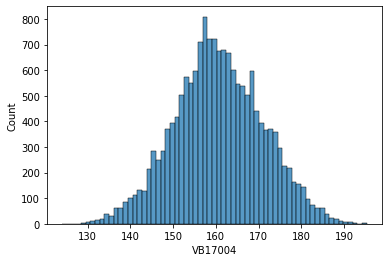

In [ ]:
# este não é o jeito padrão de plotar usando o seaborn

import seaborn as sns

ax = sns.histplot(dados["VB17004"])

[]

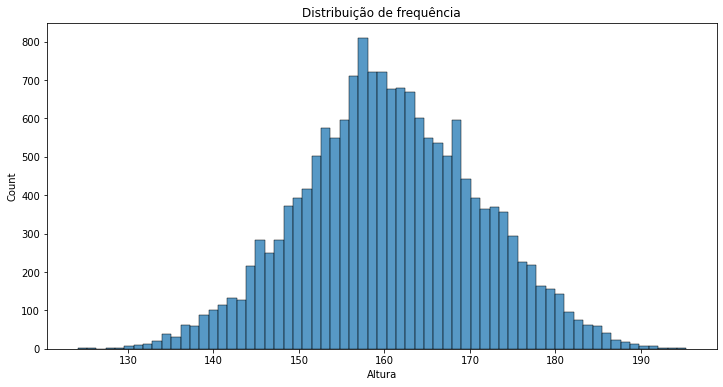

In [ ]:
# este é o jeito padrão de plotar usando o seaborn

import seaborn as sns
ax = sns.histplot(data = dados, x = "VB17004")

# tamanho do gráfico
ax.figure.set_size_inches(12,6)

# título
ax.set_title("Distribuição de frequência")

# rótulo x
ax.set_xlabel("Altura")

ax.plot()

[]

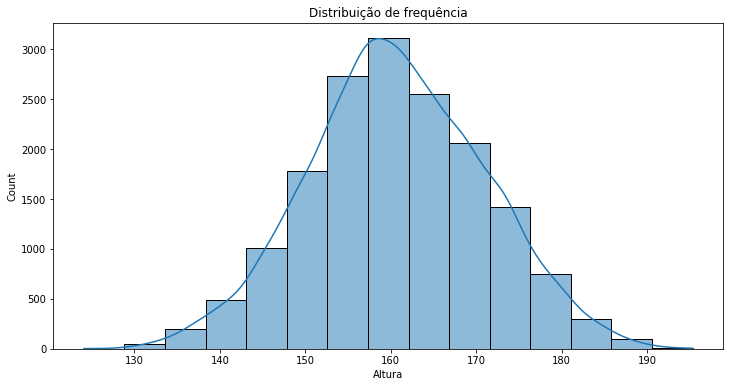

In [ ]:
# dividindo em caixinhas, seguindo a resposta da regra de Sturges + kde = True

ax = sns.histplot(data = dados, x = "VB17004", bins = 15, kde = True)

# tamanho do gráfico
ax.figure.set_size_inches(12,6)

# título
ax.set_title("Distribuição de frequência")

# rótulo x
ax.set_xlabel("Altura")

ax.plot()

Na documentação do Seaborn, histplot() https://seaborn.pydata.org/generated/seaborn.histplot.html#seaborn.histplot. Você vai ver que no parâmetro bins ele tem algumas regras que ele pode utilizar para fazer o cálculo dos intervalos e das classes.

[]

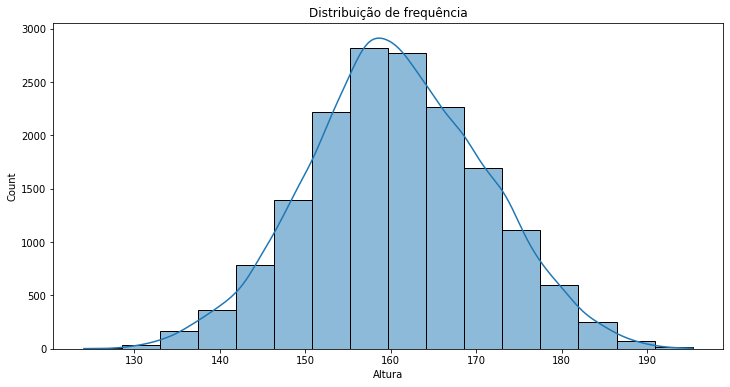

In [ ]:
# dividindo em caixinhas, seguindo o próprio Sturges + kde = True
# a divisão em classes, conforme esperado, ficou a mesma

ax = sns.histplot(data = dados, x = "VB17004", bins = 'sturges', kde = True)

# tamanho do gráfico
ax.figure.set_size_inches(12,6)

# título
ax.set_title("Distribuição de frequência")

# rótulo x
ax.set_xlabel("Altura")

ax.plot()

[]

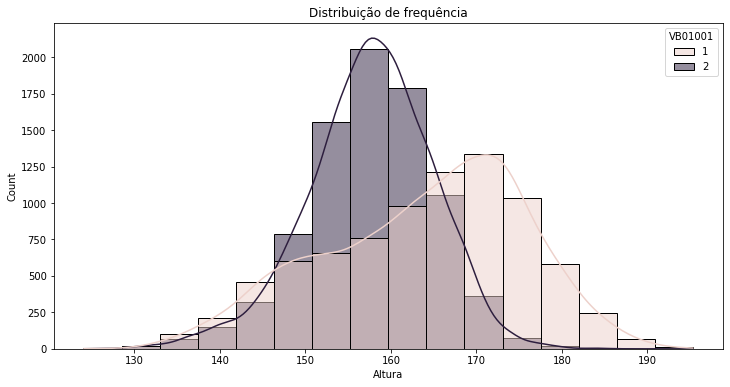

In [ ]:
# fazendo comparação da altura em relação aos sexos
ax = sns.histplot(data = dados, x = "VB17004", bins = 'sturges', kde = True, hue = "VB01001" )

# tamanho do gráfico
ax.figure.set_size_inches(12,6)

# título
ax.set_title("Distribuição de frequência")

# rótulo x
ax.set_xlabel("Altura")

ax.plot()

Mas e se compararmos uma variável que tem muitas possibilidades ao invés de apenas duas (masculino e feminino) como na figura acima?

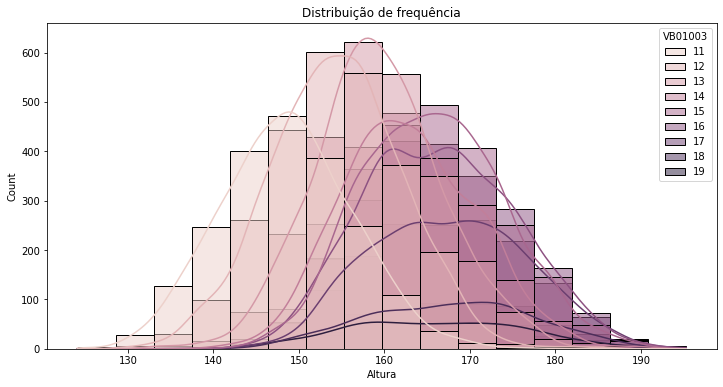

In [ ]:
# fazendo comparação da altura em relação a idade
ax = sns.histplot(data = dados, x = "VB17004", bins = 'sturges', kde = True, hue = "VB01003" )

# tamanho do gráfico
ax.figure.set_size_inches(12,6)

# título
ax.set_title("Distribuição de frequência")

# rótulo x
ax.set_xlabel("Altura")

# outra maneira de não aparecer aquele texto sobre o gráfico é simplesmente
# adicionar um ponto e vírgula no final do eixo que você quer plotar!
ax;


Como pode ver, não dá pra ver nada...
Podemos fazer uma análise separando cada um desses gráficos ou podemos trabalhar outro tipo de visualização, como o boxplot por exemplo.

## Desafio: calcular o desvio padrão, médida, moda e mediana e plotar no gráfico

[]

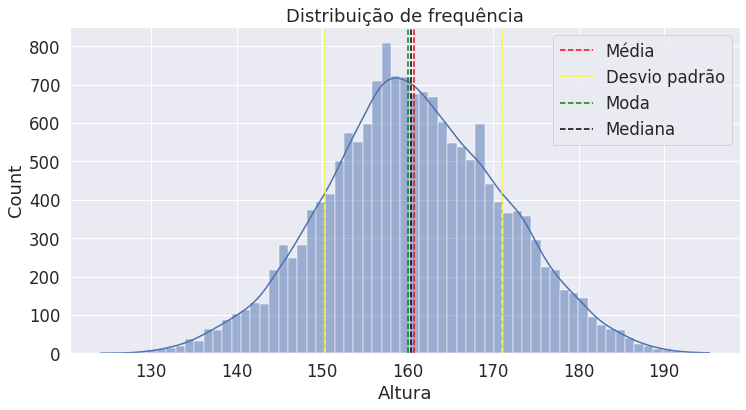

In [ ]:
# tamanho da fonte
sns.set(font_scale=1.5)

# repare que o gráfico ficou ajustado. Isso porque quando foi
# criado o objeto ax, o sns já havia sido "setado" acima
# se rodar novamente os dois gráficos anteriores, eles estarão
# ajustados também pois, conforme escrito, o sns já está "setado"

# kde = True adiciona uma linha de suavização
ax = sns.histplot(data = dados, x = "VB17004",kde=True )

# tamanho do gráfico
ax.figure.set_size_inches(12,6)

# título
ax.set_title("Distribuição de frequência")

# rótulo x
ax.set_xlabel("Altura")

# parâmetros do desafio
desvio_padrao = dados["VB17004"].std()
media = dados["VB17004"].mean()
moda = dados["VB17004"].mode()[0]
mediana = dados["VB17004"].median()

ax.axvline(media,linestyle="--", color = "red",label = "Média")
ax.axvline(media - desvio_padrao,linestyle="--", color = "yellow", label = "Desvio padrão")
ax.axvline(media + desvio_padrao,linestyle="--", color = "yellow")
ax.axvline(moda,linestyle="--", color = "green", label = "Moda")
ax.axvline(mediana,linestyle="--", color = "black", label = "Mediana")

ax.legend()
ax.plot()

# Aula 04 - Análise descritiva e testes estatísticos (2/2)

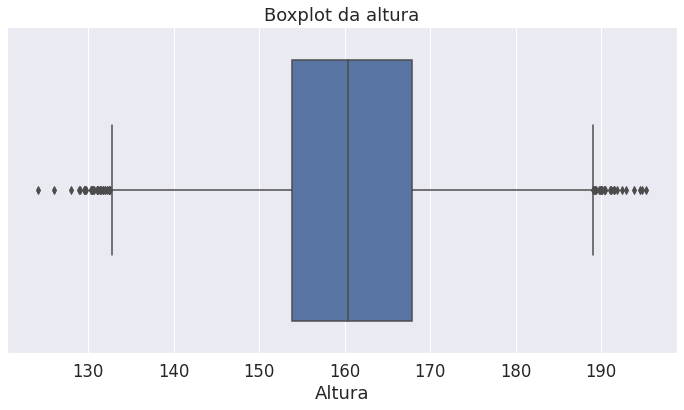

In [ ]:
ax = sns.boxplot(data = dados, x ="VB17004", whis=1.5)

# tamanho do gráfico
ax.figure.set_size_inches(12,6)

# título
ax.set_title("Boxplot da altura")

# rótulo x
ax.set_xlabel("Altura")

# outra maneira de não aparecer aquele texto sobre o gráfico é simplesmente
# adicionar um ponto e vírgula no final do eixo que você quer plotar!
ax;

In [ ]:
# para visualizar os quartis
display(dados["VB17004"].quantile(q=0.25))
display(dados["VB17004"].quantile(q=0.5))
display(dados["VB17004"].quantile(q=0.75))


153.8

160.4

167.9

Mais sobre boxplot, incluindo o cálculo dos outliers
https://www.simplypsychology.org/boxplots.html#:~:text=An%20outlier%20is%20an%20observation,whiskers%20of%20the%20box%20plot.

In [ ]:
# para saber o valor mínimo e máximo do boxplot
iqr = dados["VB17004"].quantile(q=0.75) - dados["VB17004"].quantile(q=0.25)

# repare que o parâmetro whis do gráfico acima é 1.5
minimo = dados["VB17004"].quantile(q=0.25) - (iqr*1.5)
maximo = dados["VB17004"].quantile(q=0.75) + (iqr*1.5)

display(minimo)
display(maximo)

# abaixo desse mínimo e acima desse máximo são considerados outliers

132.65000000000003

189.05

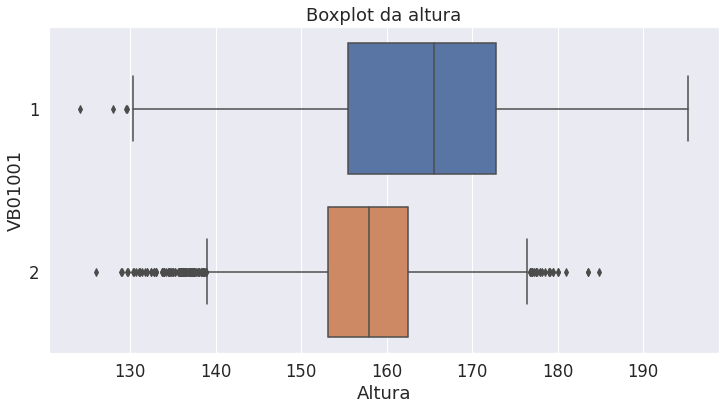

In [ ]:
ax = sns.boxplot(data = dados, x ="VB17004", y = "VB01001", whis=1.5, orient="h")

# tamanho do gráfico
ax.figure.set_size_inches(12,6)

# título
ax.set_title("Boxplot da altura")

# rótulo x
ax.set_xlabel("Altura")

ax;

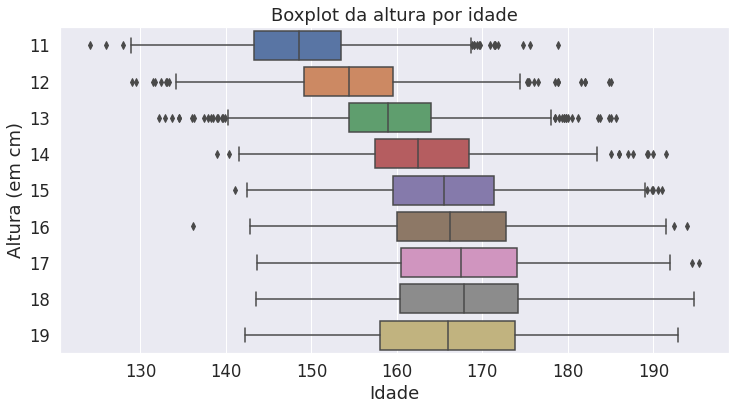

In [ ]:
# para mais de dois boxplots no mesmo gráfico não é recomendado eles dispostos horizontalmente
# veja que não fica nada didático

ax = sns.boxplot(data = dados, y ="VB01003", x = "VB17004", whis=1.5, orient="h")

# tamanho do gráfico
ax.figure.set_size_inches(12,6)

# título
ax.set_title("Boxplot da altura por idade")

# rótulo x
ax.set_xlabel("Idade")

# rótulo y
ax.set_ylabel("Altura (em cm)")

ax;



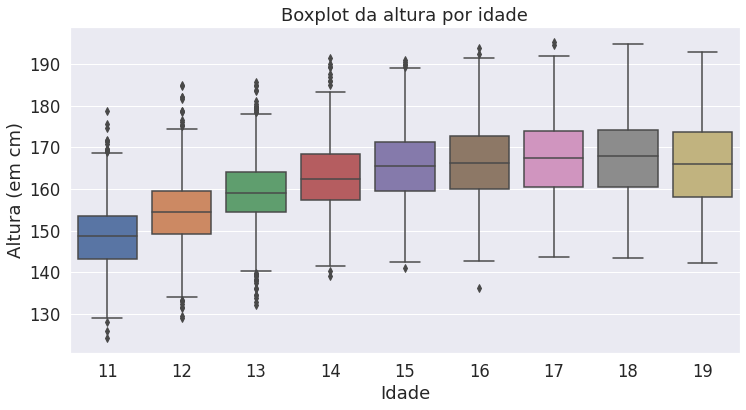

In [ ]:
# para trocar, basta remover o parâmetro "orient" (a biblioteca já entende que o padrão é vertical)
# e também trocar o "x" e "y", pois na vertical o "x" é o "y" e vice-versa

ax = sns.boxplot(data = dados, x ="VB01003", y = "VB17004", whis=1.5)

# tamanho do gráfico
ax.figure.set_size_inches(12,6)

# título
ax.set_title("Boxplot da altura por idade")

# rótulo x
ax.set_xlabel("Idade")

# rótulo y
ax.set_ylabel("Altura (em cm)")

ax;


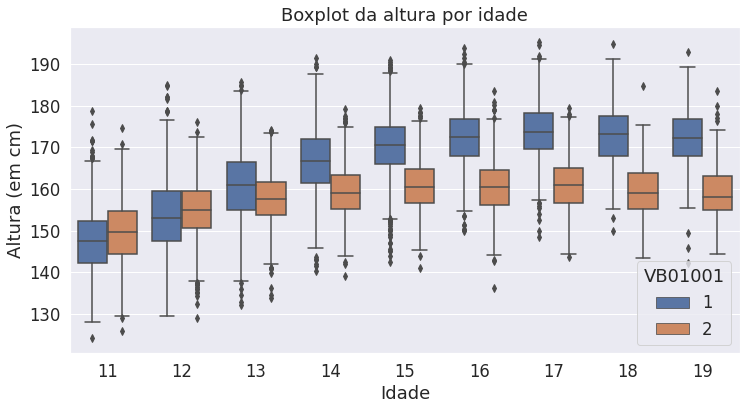

In [ ]:
# adicionando um hue do sexo dos alunos

ax = sns.boxplot(data = dados, x ="VB01003", y = "VB17004", hue = "VB01001", whis=1.5)

# tamanho do gráfico
ax.figure.set_size_inches(12,6)

# título
ax.set_title("Boxplot da altura por idade")

# rótulo x
ax.set_xlabel("Idade")

# rótulo y
ax.set_ylabel("Altura (em cm)")

ax;

[]

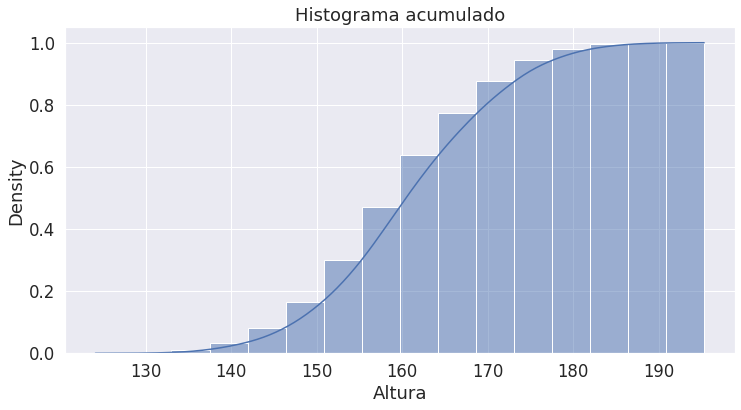

In [ ]:
# realizar uma histograma acumulado para ficar fácil compreender onde está cada fatia da amostra em termos de %


# Thiago mencionou que existe uma recomendação de deixar no máximo 80 caracteres por linha de código
ax = sns.histplot(data = dados, 
                  x = "VB17004",
                  kde = True, 
                  cumulative=True,
                  stat = 'density',
                  bins = 'sturges')

# tamanho do gráfico
ax.figure.set_size_inches(12,6)

# título
ax.set_title("Histograma acumulado")

# rótulo x
ax.set_xlabel("Altura")

ax.plot()

# Aula 05 - Medida de centralidade e dispersão (1/2)

In [ ]:
dados["VB17004"].mean()

160.71311307078818

In [ ]:
# para fazer a média de acordo com o sexo da pessoa: query ou groupby são os mais indicados

# primeiro eu agrupo pelo sexo, depois tiro a média
dados.groupby("VB01001")["VB17004"].mean()

VB01001
1    163.860758
2    157.558617
Name: VB17004, dtype: float64

In [ ]:
# valor (ou valores) que mais aparece nos dados

dados["VB17004"].mode()

0    160.0
dtype: float64

In [ ]:
# posso agrupar por mais de uma coluna e tirar a média
dados.groupby(["VB01001","VB01003"])["VB17004"].mean()

# o resultado é uma series multi-index

VB01001  VB01003
1        11         147.617753
         12         153.696764
         13         160.719801
         14         166.406922
         15         170.336297
         16         172.424933
         17         173.814341
         18         173.024561
         19         172.143158
2        11         149.522512
         12         154.965021
         13         157.673105
         14         159.340320
         15         160.759848
         16         160.386527
         17         160.907937
         18         159.438462
         19         158.977193
Name: VB17004, dtype: float64

## Desafio: efetuar o cálculo da média por sexo e idade usando o crosstab.

In [ ]:
altura_por_idade_sexo = pd.crosstab(dados["VB01003"],dados["VB01001"], values = dados["VB17004"], aggfunc="mean")
altura_por_idade_sexo

VB01001,1,2
VB01003,,
11,147.617753,149.522512
12,153.696764,154.965021
13,160.719801,157.673105
14,166.406922,159.340320
15,170.336297,160.759848
16,172.424933,160.386527
17,173.814341,160.907937
18,173.024561,159.438462
19,172.143158,158.977193


## Superdesafio 1: criar um dicionário para facilitar a busca da pergunta

In [ ]:
# só foi necessário efetuar uma vez o código abaixo
## % cd/content/drive/MyDrive/Ciência de Dados/Bootcamp da Alura/Modulo_3
## !unzip \*.zip



# tive que unzipar porque estava dando erro: "UnsupportedOperation: seek"
# no fórum, foi mencionada a seguinte solução que funcionou (testei abaixo)

# "Troca o .open por .read que deve funcionar
# Não conheço a fundo mas pelo que vi o open trás o conteúdo do arquivo como se tentasse abrir com o bloco de notas ou gedit (acessar como texto), enquanto o read retorna diretamente os bytes do arquivo"


In [ ]:
caminho_pasta_zipada = zip.namelist()[-1]
d = pd.read_excel(zip.read(caminho_pasta_zipada), sheet_name="AMOSTRA2_ALUNO")
d.head()

,VARIÁVEL,QUESTIONÁRIO DO ALUNO
0,ANOPESQ,Ano em que a pesquisa foi realizada
1,PAIS,País
2,76,Brasil
3,REGEOGR,Região geográfica
4,1,Norte


In [ ]:
# usei a solução com o arquivo unzipado pois só vi a dica acima depois que havia terminado o desafio
# depois voltei a ler o zip pois quis diminuir o volume de dados no meu drive
##d = pd.read_excel("/content/drive/MyDrive/Ciência de Dados/Bootcamp da Alura/Modulo_3/Dicionario_PENSE_Microdados_AMOSTRA2.xls", sheet_name="AMOSTRA2_ALUNO")

d = pd.read_excel(zip.read(caminho_pasta_zipada), sheet_name="AMOSTRA2_ALUNO")

def dicionario(pergunta):
  encontrou = False
  alternativas = {}

  for index, row in (d.iterrows()):
    valor = d.loc[index][0]
    
    if type(valor) == str:
      if valor.isnumeric() == True:
        valor = int(valor)

    if encontrou == True and (type(valor) == int or type(valor) == float):
      ind_alt = d.loc[index][0]
      txt_alt = d.loc[index][1]
      alternativas[ind_alt] = txt_alt
    
    if encontrou == True and (type(valor) != int and type(valor) != float):
      return {pergunta: p, "alternativas":alternativas}
    
    if valor == pergunta:
      p = d.loc[index][1]
      encontrou = True
    
    if index == (len(d)-1):
      return("Pergunta não encontrada")


In [ ]:
pergunta = dicionario("VB01008A")

# exemplo de uso
display(pergunta["VB01008A"])
print ('\n')
display(pergunta["alternativas"])
print('\n')

# isso é exatamento aquele dicionário criado na mão anteriormente
display(respostas)

# portanto, temos um potencial uso de automatizar qualquer análise de frequência
# bastando efetuar os ajustes

'Qual nível de ensino (grau) sua mãe estudou ou estuda?'

{'1': 'Minha mãe não estudou',
 '2': 'Minha mãe começou o ensino fundamental ou 1º grau, mas não terminou',
 '3': 'Minha mãe terminou o ensino fundamental ou 1º grau',
 '4': 'Minha mãe começou o ensino médio ou 2º grau, mas não terminou',
 '5': 'Minha mãe terminou o ensino médio ou 2° grau',
 '6': 'Minha mãe começou a faculdade (ensino superior), mas não terminou',
 '7': 'Minha mãe terminou a faculdade (ensino superior)',
 '8': 'Não sei',
 99: 'Não informado'}

{1: 'Muito satisfeito',
 2: 'Satisfeito',
 3: 'Indiferente',
 4: 'Insatisfeito',
 5: 'Muito insatisfeito',
 99: 'Não Informado'}

## Superdesafio 2: de alguma maneira, sumarizar as perguntas para ficar mais curta, usando NLP. Dica é buscar saber sobre NLTK e GESIM:

"A dica é que temos uma ferramenta em Python chamada NLTK. Tem outra também conhecida como Gensim. Essas ferramentas vão te ajudar, por exemplo, a fazer o tagueamento das minhas palavras, e o que é o tagueamento? É eu falar quando aquela palavra é um verbo ou quando aquela palavra é um objeto ou quando aquela palavra é um predicado e assim sucessivamente."

Sinceramente, nesse momento tal atividade não é prioridade visto que isso é um desafio por si só com baixo valor retornável; é desafio por si só pois envolve estudos de um ramo da ciência de dados que não estamos tratando neste bootcamp que é processamento de linguagem natural e baixo valor retornável pois não mudará em nada a compreensão e análises desse arquivo de dados. Mas observarei no discord as dicussões sobre tal desafio e postarei aqui se achá-las interessante.

# Aula 05 - Medida de centralidade e dispersão (2/2)

In [ ]:
media_altura = dados["VB17004"].mean()
dados["MEDIA_ALTURA"] = media_altura 
diferenca_media = dados["VB17004"] - media_altura
dados["DIFERENCA_MEDIA"] = diferenca_media

dados[["VB17004","MEDIA_ALTURA", "DIFERENCA_MEDIA"]]

,VB17004,MEDIA_ALTURA,DIFERENCA_MEDIA
0,157.0,160.713113,-3.713113
1,152.0,160.713113,-8.713113
2,161.4,160.713113,0.686887
3,172.5,160.713113,11.786887
4,167.5,160.713113,6.786887
...,...,...,...
16551,167.9,160.713113,7.186887
16552,185.8,160.713113,25.086887
16553,159.4,160.713113,-1.313113
16554,157.8,160.713113,-2.913113


Thiago mencionou que o dataframe anterior poderia ser utilziado para calcular o desvio absoluto médio. Pesquisando sobre isso, achei:

"O desvio absoluto médio de um conjunto de dados é a média das distâncias entre cada dado e a média. Ele nos dá uma noção da variabilidade em um conjunto de dados. Isso é o que chamamos de desvios absolutos"

Fonte: https://pt.khanacademy.org/math/statistics-probability/summarizing-quantitative-data/other-measures-of-spread/a/mean-absolute-deviation-mad-review#:~:text=O%20desvio%20absoluto%20m%C3%A9dio%20de,em%20um%20conjunto%20de%20dados.&text=Isso%20%C3%A9%20o%20que%20chamamos%20de%20desvios%20absolutos.

In [ ]:
diferenca_quadrada = diferenca_media**2
dados["DIFERENCA_QUADRADA"] = diferenca_quadrada

dados[["VB17004","MEDIA_ALTURA", "DIFERENCA_MEDIA","DIFERENCA_QUADRADA"]]


,VB17004,MEDIA_ALTURA,DIFERENCA_MEDIA,DIFERENCA_QUADRADA
0,157.0,160.713113,-3.713113,13.787209
1,152.0,160.713113,-8.713113,75.918339
2,161.4,160.713113,0.686887,0.471814
3,172.5,160.713113,11.786887,138.930703
4,167.5,160.713113,6.786887,46.061834
...,...,...,...,...
16551,167.9,160.713113,7.186887,51.651344
16552,185.8,160.713113,25.086887,629.351896
16553,159.4,160.713113,-1.313113,1.724266
16554,157.8,160.713113,-2.913113,8.486228


In [ ]:
# agora podemos calcular a média da diferença quadrada
# esse valor é chamado de "variância", no caso da amostra (e não da população)
dados["DIFERENCA_QUADRADA"].mean()


106.9105945368652

In [ ]:
# outra maneira de calcular a variância (ele usou a fórmula: "1/(n-1)" e somente explicou que era parecido com a média
# exceto esse "menos um"; mas ele não explicou nada além disso.
# portanto, essa variância foi ligeiramente diferente da anterior (pois anterior sim é apenas uma média)

variancia_amostral = 1/(len(dados)-1) * dados["DIFERENCA_QUADRADA"].sum()
variancia_amostral

106.91705244049119

Como a variância está "ao quadrado" é necessário tirar a raiz.
Se tirarmos a raiz quadrada da variância temos então o desvio padrão.

In [ ]:
desvio_padrao = np.sqrt(variancia_amostral)
desvio_padrao

10.340070233827776

In [ ]:
# ao calcular pelo método std() é esperado o mesmo resultado
dados["VB17004"].std()

10.3400702338278

# Aula 06 - Intervalo de Confiança e Testes (1/2)

Estamos trabalhando com uma amostra. Como que eu faço para saber o quanto dessa amostra representa no mundo real?
A resposta está no Intervalo de Confiança.
https://www.statsmodels.org/stable/generated/statsmodels.stats.weightstats.zconfint.html

In [ ]:
# importar o teste estatístico Z. Chamado de Z teste.
from statsmodels.stats.weightstats import zconfint

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# o to_list() é para transformar uma série em lista e assim o zconfint não reclamar (no futuro ele não aceitará séries)
zconfint(dados["VB17004"].to_list())

(160.5556082427712, 160.87061789880892)

"O que esse intervalo de confiança quer nos dizer? Que existe uma chance de a média das alturas dos jovens no ensino fundamental ao ensino médio esteja representada dentro desse intervalo, que vai de 160.55 a 160.87. Mas qual é essa chance dessa média da minha população, do meu valor real, estar dentro desse meu intervalo de confiança?

A chance desse valor real estar dentro desse meu intervalo de confiança é de 95%, que é o chamado nível de confiança. E como eu sei isso? Porque aqui na nossa documentação ele fala que esse alpha é de 0.05."

Alpha é chamado de significância.

"O zconfint não é o único que nos dá esse intervalo de confiança; temos outros testes que podem nos dar esse intervalo de confiança também.
Um desses outros testes é o chamado ttest. E cada um deles tem uma usabilidade, quando eu vou usar um, quando eu vou usar outro, você vai descobrir nos vídeos complementares (do bootcamp)"

Um dos métodos descritos na documentação do link a segui é o "tconfint"

https://www.statsmodels.org/stable/generated/statsmodels.stats.weightstats.DescrStatsW.html#statsmodels.stats.weightstats.DescrStatsW

O ttest pede para nós fazermos a descrição dos nossos dados.

In [ ]:
from statsmodels.stats.weightstats import DescrStatsW

In [ ]:
descricao_altura = DescrStatsW(dados["VB17004"])
descricao_altura

In [ ]:
# repare que o valor é muito próximo ao obtido no zconfint
descricao_altura.tconfint_mean()

(160.55559672649298, 160.8706294150872)

É importante saber o que é "intervalo de confiança", "nível confiança" e "significância".

## Desafio: plotar o intervalo de confiança no histograma das alturas

[]

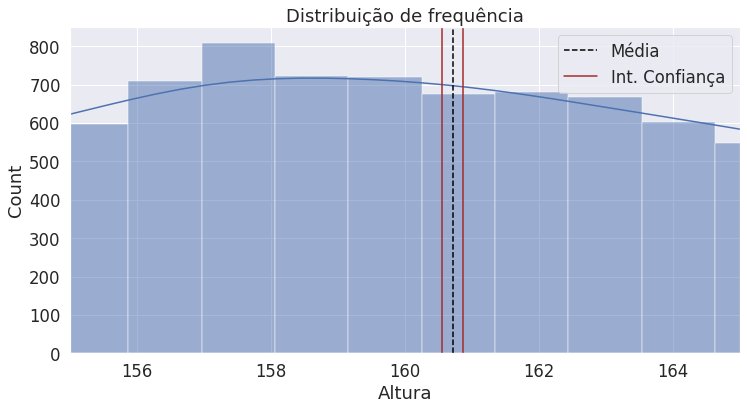

In [ ]:
# tamanho da fonte
sns.set(font_scale=1.5)

# kde = True adiciona uma linha de suavização
ax = sns.histplot(data = dados, x = "VB17004",kde=True )

# tamanho do gráfico
ax.figure.set_size_inches(12,6)

# título
ax.set_title("Distribuição de frequência")

# rótulo x
ax.set_xlabel("Altura")

# parâmetros do desafio
media = dados["VB17004"].mean()
int_confianca_inf = descricao_altura.tconfint_mean()[0]
int_confianca_sup = descricao_altura.tconfint_mean()[1]

ax.axvline(media,linestyle="--", color = "black",label = "Média")

ax.axvline(int_confianca_inf, ls="solid", color = "brown", label = "Int. Confiança")
ax.axvline(int_confianca_sup, ls="solid", color = "brown")

# efeito "zoom" no gráfico (só quero observar uma fração do eixo x)
ax.set_xlim(155,165)

ax.legend()
ax.plot()

# Aula 06 - Intervalo de Confiança e Testes (2/2) Parte I

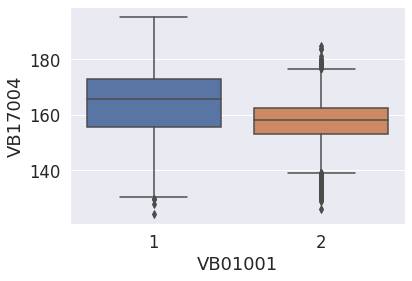

In [ ]:
sns.boxplot(x = "VB01001", y = "VB17004", data = dados)

 Será que a diferença entre as médias dessas distribuições é estatisticamente relevante? Será que a partir do ztest() eu posso verificar se elas têm diferenças significativas uma entre outra?

In [ ]:
from statsmodels.stats.weightstats import ztest

distribuicao_altura_m = dados.query("VB01001==1")["VB17004"]
distribuicao_altura_f = dados.query("VB01001==2")["VB17004"]

_ , p_value = ztest(distribuicao_altura_m, distribuicao_altura_f)
p_value

0.0

O ztest retorna uma tupla (41.16851708819389, 0.0). O primeiro parâmetro são as informações sobre as estatísticas do ztest(), isso nós vamos ignorar por enquanto, mas o que me interessa aqui é o segundo parâmetro dessa tupla que ele retorna, que é 0.0. Esse 0.0 é conhecido como p_value.

In [ ]:
_ , pvalue = ztest(distribuicao_altura_m, distribuicao_altura_f)
pvalue

0.0

O que o p_value me fala? Por ele, eu posso rejeitar a hipótese nula ou aceitar a hipótese nula. E qual é a hipótese nula do ztest()? Aí você pode e dar uma lida na documentação:

https://www.statsmodels.org/stable/generated/statsmodels.stats.weightstats.ztest.html

Na documentação, ele fala o que ele está testando: ele está verificando se as médias entre essas distribuições são iguais.




Através do ztest, podemos desconsiderar a hipótese nula. Portanto, as médias são significativamente diferentes entre os meninos e as meninas.

In [ ]:
# repare que ao comparar a mesma distribuição de altura, o p_value é 1
# portanto, nesse caso, a gente aceita a hipótese zero

_ , pvalue = ztest(distribuicao_altura_m, distribuicao_altura_m)
pvalue

1.0

Duas das principais premissas do ztest: tamanho da nossa amostra -> o n da amostra tem que ser maior que 30 e a outro é que ela considera que a sua distribuição é normal.

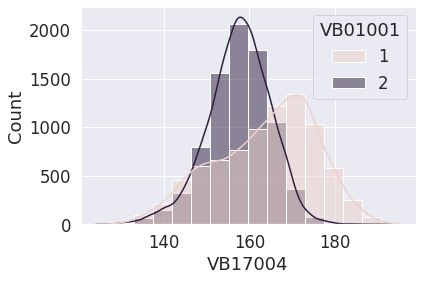

In [ ]:
# conforme já foi visto, parece que a distribuição de altura dos alunos do sexo F é normal
# enquanto que a distribuição de altura dos alunos do sexo M não é normal

ax = sns.histplot(data = dados, x = "VB17004", bins = 'sturges', kde = True, hue = "VB01001" )

Preciso também conseguir provar através de testes estatísticos se aquela minha distribuição é normal ou não. Portanto, preciso fazer um "normal test".

https://docs.scipy.org/doc/scipy-0.16.0/reference/generated/scipy.stats.normaltest.html

“Thiago, até o momento nós estávamos utilizando aquele statsmodels”. O Statsmodels é uma biblioteca muito rica, tem muita coisa relacionada à parte de estatística. Você pode explorar essa biblioteca, acho que é excelente que você explore até, mas o stats do SciPy tem alguns métodos às vezes um pouco mais simples de ser utilizados. E um desses é o normal test. Nós podemos aplicar esse normal test lá na nossa base de dados.

In [ ]:
from scipy.stats import normaltest

_, p_value_normaltest_m = normaltest(distribuicao_altura_m)
_, p_value_normaltest_f = normaltest(distribuicao_altura_f)

print(p_value_normaltest_m, p_value_normaltest_f)

7.695118853996524e-75 7.125189471020874e-47


O p_value já deu como menor que 0.05. Se ele é menor que 0.05, eu já sei o que eu recuso a minha hipótese 0. Mas qual é a minha hipótese 0? Não sei, eu preciso verificar na documentação do SciPy o que eu estou testando no normaltest().


"This function tests the null hypothesis that a sample comes from a normal distribution. It is based on D’Agostino and Pearson’s test that combines skew and kurtosis to produce an omnibus test of normality."

Na documentação (trecho acima) está falando para mim que está verificando que a hipótese nula pertence a uma distribuição normal. Neste caso, estamos refutando a nossa hipótese 0, então a nossa hipótese alternativa, que é a hipótese 1, afirma que a nossa distribuição não é uma distribuição normal.

Nós comprovamos, através de testes de hipótese, que a distribuição da curva da altura das pessoas do sexo masculino e feminino não é uma curva normal

O detalhe é que para o segundo caso, para as mulheres, ele se aproxima mais de ter uma distribuição normal. Apesar de não ser, ele se aproxima mais, sendo que nós achamos que tinha uma cara de distribuição normal.

## Desafio: Como será que é a distribuição do IMC para as pessoas que estão satisfeitas com o seu corpo? Ela é estatisticamente diferente da distribuição das pessoas que estão insatisfeitas com o seu corpo?

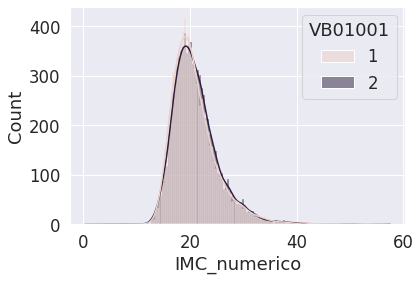

In [ ]:
# calcular o IMC (massa/altura²); altura é em metros.
dados["IMC_numerico"] = dados["VB17003"]/(dados["VB17004"]/100)**2

ax = sns.histplot(data = dados, x = "IMC_numerico", kde = True, hue = "VB01001" )


In [ ]:
dicionario("VB11007")

{'VB11007': 'Como você se sente em relação ao seu corpo?',
 'alternativas': {'1': 'Muito satisfeito(a)',
  '2': 'Satisfeito(a)',
  '3': 'Indiferente',
  '4': 'Insatisfeito(a)',
  '5': 'Muito insatisfeito(a)',
  99: 'Não informado'}}

In [ ]:
distribuicao_satisfeito = dados.query("VB11007 == 1 or VB11007 == 2")["IMC_numerico"]
distribuicao_insatisfeito = dados.query("VB11007 == 4 or VB11007 == 5")["IMC_numerico"]

_ , pvalue = ztest(distribuicao_satisfeito, distribuicao_insatisfeito)
pvalue

4.98964248431594e-216

Vimos que a distribuição do IMC é a mesma para H e M.
Também vimos que a distribuição do IMC entre aqueles satisfeitos e insatisfeitos com o corpo é de fato diferente.

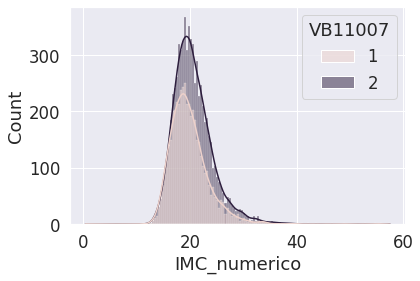

In [ ]:
ax = sns.histplot(data = dados.query("VB11007 == 1 or VB11007 == 2"), x = "IMC_numerico", kde = True, hue = "VB11007" )

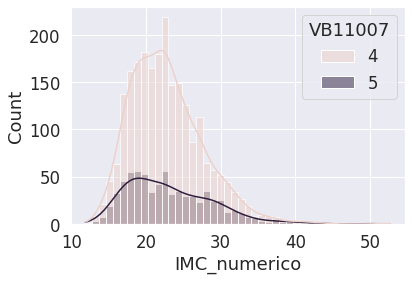

In [ ]:
ax = sns.histplot(data = dados.query("VB11007 == 4 or VB11007 == 5"), x = "IMC_numerico", kde = True, hue = "VB11007" )

In [ ]:
display(dados.query("VB11007 == 1 or VB11007 == 2")["IMC_numerico"].mean())
display(dados.query("VB11007 == 4 or VB11007 == 5")["IMC_numerico"].mean())
print('\n')
display(dados.query("VB11007 == 1 or VB11007 == 2")["IMC_numerico"].quantile(q=0.5))
display(dados.query("VB11007 == 4 or VB11007 == 5")["IMC_numerico"].quantile(q=0.5))



20.304968116079348

22.871879145965416

19.787062129051478

22.206562177457517

Verificamos que a média e mediana do IMC são diferentes para as duas distribuições, mas em ambas o IMC está na faixa "ideal". Ou seja, embora metade da população dentre os alunos que estão insatisfeitos com o corpo ser de fato ligeiramente superior, eles estão tão saudáveis quanto aqueles que estão satisfeitos com o corpo.





In [ ]:
# EXTRA (1/3): ao se analisar a média e desvio padrão do IMC dentre os
# "muito satisfeitos" e "insatifeitos" verificamos que são
# muito próximos.

display(dados.query("VB11007 == 1")["IMC_numerico"].mean())
display(dados.query("VB11007 == 1")["IMC_numerico"].std())

print('\n')

display(dados.query("VB11007 == 2")["IMC_numerico"].mean())
display(dados.query("VB11007 == 2")["IMC_numerico"].std())



19.855428597220666

3.5731952080676557

20.604314662741427

3.6948044581184964

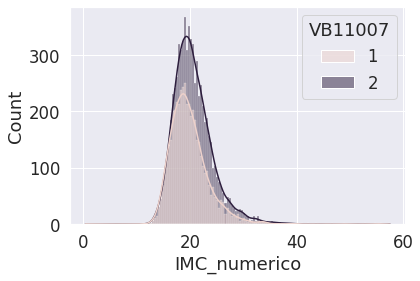

In [ ]:
# EXTRA (2/3): também temos essa impressão ao olhar a distribuição do gráfico.
ax = sns.histplot(data = dados.query("VB11007 == 1 or VB11007 == 2"), x = "IMC_numerico", kde = True, hue = "VB11007")

In [ ]:
# EXTRA (2/3): No entanto, ao calcular o P-VALOR para essas distribuições, ele
# indica que a média é de fato DIFERENTE (segundo o Thiago, por ser menor de 0,05)
# das duas uma: ou o zteste aponta realidades muito CONTRAINTUITIVAS ou estamos interpretando
# muito mal o que tal teste faz. Por isso é essencial o estudo e aprofundamento dos
# conceitos de estatística!

distribuicao_muito_satisfeito = dados.query("VB11007 == 1")["IMC_numerico"]
distribuicao_satisfeito = dados.query("VB11007 == 2")["IMC_numerico"]

_ , pvalue = ztest(distribuicao_muito_satisfeito, distribuicao_satisfeito)
pvalue

3.417643064694358e-27

In [ ]:
# na parte II desta aula foifalado sobre o ztest não ser uma boa pois as distribuições não são normal.
# é mostrado um teste não paramétrico (que funciona para distribuições não normais); mas este teste 
# também rejeita a hipótese nula (p-valor muito pequeno) entre os muito satisfeitos e os satisfeitos.
# inclusive, se repararmos, vimos que o p-valor do ranksums é até menor que o obtido via ztest
# logo, fico sem entender, com a certeza que devo estudar bastante...

from scipy.stats import ranksums

_ , pvalue = ranksums(distribuicao_muito_satisfeito, distribuicao_satisfeito)
pvalue

5.177427259482811e-33

In [ ]:
print(len(distribuicao_muito_satisfeito))
print(len(distribuicao_satisfeito))

4608
6920


In [ ]:
# algo que percebi é que o P-VALOR depende do tamanho da amostra!
# então fica a pergunta: qual é o tamanho ideal da amostra para calcular o P-VALOR ?

_ , pvalue = ranksums(distribuicao_muito_satisfeito.sample(n=10, random_state=10), distribuicao_satisfeito.sample(n=10, random_state=10))
print(pvalue)

_ , pvalue = ranksums(distribuicao_muito_satisfeito.sample(n=100, random_state=10), distribuicao_satisfeito.sample(n=100, random_state=10))
print(pvalue)

_ , pvalue = ranksums(distribuicao_muito_satisfeito.sample(n=1000, random_state=10), distribuicao_satisfeito.sample(n=1000, random_state=10))
print(pvalue)

_ , pvalue = ranksums(distribuicao_muito_satisfeito.sample(n=2000, random_state=10), distribuicao_satisfeito.sample(n=2000, random_state=10))
print(pvalue)

# tamanho próximo do número de registros da amostra
_ , pvalue = ranksums(distribuicao_muito_satisfeito.sample(n=4500, random_state=10), distribuicao_satisfeito.sample(n=4500, random_state=10)) 
print(pvalue)

# por enquanto ainda não foi mencionado sobre a influência do N no teste de hipóteses.
# deveria ter sido mencionado, uma vez que ele falou da regra do p-valor (menor que 0.05, por exemplo) e também de algumas premissas adotadas para a execução do ztest.


0.5453496680111236
0.2704754150004076
5.291949992156597e-09
2.2942114095505263e-16
1.5461581524542035e-26


## Desafio: Realizar os testes de hipóteses de outras colunas

In [ ]:
dicionario("VB17003")

{'VB17003': 'Peso do estudante, incluindo os imputados, com uma casa decimal ',
 'alternativas': {}}

In [ ]:
# distribuição da massa

distribuicao_peso_m = dados.query("VB01001==1")["VB17003"]
distribuicao_peso_f = dados.query("VB01001==2")["VB17003"]

_ , p_value = ztest(distribuicao_peso_m, distribuicao_peso_f)
p_value


7.903530638224804e-73

Novamente o P-VALOR foi rejeitado. Até agora não vimos nenhum exemplo de ZTEST onde as distribuições são consideradas iguais, exceto quando forçamos comparar uma distribuição com ela mesma.

Já fizemos Ztest para a altura dos alunos (comparando H e M), IMC entre os satifeitos e insatisfeitos (incluindo os "muitos"), IMC entre os muito satisfeitos e muito insatisfeitos e agora a massa dos alunos (comparando H e M).

E mais uma vez, parece que a distribuição é parecida. É necessário aprofundar nesses conceitos. Alguém  que não sabe o que está fazendo com estatística não pode concluir nada.

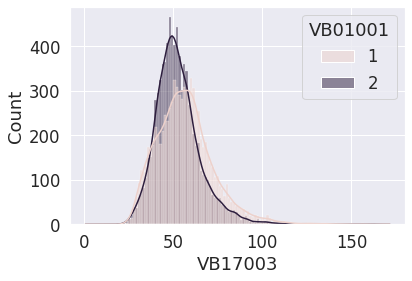

In [ ]:
ax = sns.histplot(data = dados, x = "VB17003", kde = True, hue = "VB01001" )

In [ ]:
# porém...
# lembrando-se da premissa do ztest (n > 30 e distribuição normal) verificamos
# que a distribuição dos que estão muito satisfeitos e dos que estão muito insatisfeito não é normal
# então o ztest não é uma boa...

_, p_value_normaltest_m = normaltest(distribuicao_muito_satisfeito)
_, p_value_normaltest_f = normaltest(distribuicao_satisfeito)

print(p_value_normaltest_m, p_value_normaltest_f)

0.0 0.0


# Aula 06 - Intervalo de Confiança e Testes (2/2) Parte II

In [ ]:
# sendo o ztest inapropriado para as distribuições não normais, temos que aplicar os testes não-paramétricos.
# um deles é o ranksums (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ranksums.html)

from scipy.stats import ranksums

ranksums(distribuicao_altura_m, distribuicao_altura_f)

RanksumsResult(statistic=40.7525576033863, pvalue=0.0)

E olha só o que ele me retornou, ele me retornou um p_value = 0. E o que o pvalue = 0 está fazendo? O p_value é menor que 0.05. Se ele é menor que 0.05, eu rejeito a minha hipótese nula.

Lembrando o seguinte, esse p_value = 0.05 que nós determinamos é que nós queremos um nível de confiança, aquilo que comentamos lá quanto estávamos falando de intervalo de confiança, igual a 95%. É por isso que estamos determinando esse p_value como 0.05. Se eu fosse utilizar um nível de confiança igual a 0.9 ou 90%, o meu pvalue passa a ser o 0.1 e assim sucessivamente.

O que o ranksums() está falando para mim? Ele está falando para mim agora que a minha hipótese nula através do pvalue foi rejeitada. E qual é a hipótese nula do ranksums()? Diferente do nosso ztest(), que considerava a média das distribuições, porque ele olha isso como uma curva normal, o ranksums() não olha para isso como uma curva normal.

Texto da documentação do ranksums:
"The Wilcoxon rank-sum test tests the null hypothesis that two sets of measurements are drawn from the same distribution. The alternative hypothesis is that values in one sample are more likely to be larger than the values in the other sample."

O ranksums() aqui está verificando como hipótese nula se essas minhas duas distribuições são provenientes da mesma distribuição, ele não está comparando mais as médias, agora ele está olhando para a minha distribuição. E a partir disso eu consigo provar que elas vêm de distribuições diferentes, porque eu rejeitei a minha hipótese nula. Agora sim temos confiabilidade para falar que essas distribuições são estatisticamente diferentes

Tabelas do PENSE 2015
https://www.ibge.gov.br/estatisticas/sociais/educacao/9134-pesquisa-nacional-de-saude-do-escolar.html?=&t=resultados

# Alura Mais: Média, Mediana e Moda

In [ ]:
# Média é tranquilo

# Considerações sobre Mediana abaixo

import statistics 

# primeiro ele ordena os elementos e depois:
# se n for ímpar, pega o elemento (n+1)/2
# se n for par, pega o elemento n/2 e soma com o elemento (n/2)+1 e divide por 2

# para faciitar o entendimento, a lista já foi criada de maneira ordenada
lista_n_par = [1,2,2,3,5,5]
print(statistics.median(lista_n_par))

lista_n_impar = [1,2,3,5,5]
print(statistics.median(lista_n_impar))


2.5
3


In [ ]:
# para encontrar a moda (considerando a realidade de ser multimodal) há alguma possibilidades, porém:

##1##

# print(statistics.mode(lista_n_par))


# resulta em erro:
# no unique mode; found 2 equally common values

# se a lista apresentasse apenas uma moda, não teria erro



In [ ]:
##2##
from scipy import stats
print(stats.mode(lista_n_par)[0])

# captura apenas a o primeiro elemento do multimoda (ou seja, vou perder informação)

[2]


In [ ]:
##3##

# from statistics import multimode
# multimode(lista_n_par)

# resulta em erro pois está disponível apenas no python 3.8


In [ ]:
##4##

from collections import Counter

c = Counter([1,2,2,3,5,5])
print(c.most_common())

# cria uma lista de tuplas, com o par: "(elemento, número de ocorrências)", de maneira ordenada:

# para imprimir apenas os 2 primeiros (que aparecem mais):
print(c.most_common()[0:2])

# ou simplesmente:
print(c.most_common(2))

[(2, 2), (5, 2), (1, 1), (3, 1)]
[(2, 2), (5, 2)]
[(2, 2), (5, 2)]
